In [2]:
#mapping some polygons - Jan 24-2021 - Sunday
import pandas as pd
import geopandas as gpd
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import cm
#import folium
import numpy as np
%matplotlib inline

In [3]:
import pandas as pd
from datetime import datetime
def lat_lon_to_float (v):
    """Convert strings from NHC to float locations"""
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1])*multiplier

In [4]:
hurdata = []
with open ('hurdat2.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            storm_id = line.split(',')
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(',')
            dt = datetime.strptime(location_line[0] + location_line[1],"%Y%m%d %H%M")
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            hurdata.append([storm_number,storm_name,storm_status,storm_lat,storm_lon,dt,max_speed])

In [5]:
hurdata[26684]

['AL031963',
 'UNNAMED',
 'TD',
 25.5,
 -67.5,
 datetime.datetime(1963, 9, 9, 12, 0),
 25.0]

In [6]:
df = pd.DataFrame(hurdata, columns = ['Storm Number','Storm Name', 'Storm Status', 'Lat', 'Lon','Time', 'Max Speed'])

In [7]:
df.head()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
0,AL011851,UNNAMED,HU,28.0,-94.8,1851-06-25 00:00:00,80.0
1,AL011851,UNNAMED,HU,28.0,-95.4,1851-06-25 06:00:00,80.0
2,AL011851,UNNAMED,HU,28.0,-96.0,1851-06-25 12:00:00,80.0
3,AL011851,UNNAMED,HU,28.1,-96.5,1851-06-25 18:00:00,80.0
4,AL011851,UNNAMED,HU,28.2,-96.8,1851-06-25 21:00:00,80.0


In [8]:
min(df['Lon'])

-109.5

In [9]:
df.groupby('Storm Status').count()

,Storm Number,Storm Name,Lat,Lon,Time,Max Speed
Storm Status,,,,,,
DB,153,153,153,153,153,153
EX,5413,5413,5413,5413,5413,5413
HU,15042,15042,15042,15042,15042,15042
LO,1256,1256,1256,1256,1256,1256
SD,305,305,305,305,305,305
SS,624,624,624,624,624,624
TD,10052,10052,10052,10052,10052,10052
TS,18834,18834,18834,18834,18834,18834
WV,138,138,138,138,138,138


In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
plot_crs = ccrs.LambertConformal(central_longitude =-100., central_latitude = 45)
data_crs = ccrs.PlateCarree()


/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.z

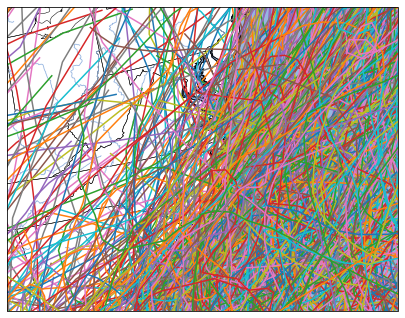

In [12]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

def basincoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    basinlon = dfbasin['Lon']
    basinlat = dfbasin['Lat']

    return basinlon, basinlat

def buffercoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    bufferlon = dfbuffer['Lon']
    bufferlat = dfbuffer['Lat']

    return bufferlon, bufferlat


fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1,projection = plot_crs)

ax.set_extent([-85,-70,32,40],data_crs)
ax.coastlines('50m', edgecolor = 'k', linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85)
ax.add_feature(cfeature.OCEAN)


for storm_number in df['Storm Number'].unique():
    storm_data = df[df['Storm Number'] == storm_number]
    ax.plot(storm_data['Lon'], storm_data['Lat'], transform = data_crs)